## Portfolio Optimization

In [1]:
# ! pip install Quandl

In [2]:
# ! pip install pandas-datareader

In [3]:
"""Loading libraries"""

import numpy as np
import pandas as pd
import pandas_datareader as web
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
from IPython.display import display
from time import time

import quandl
quandl.ApiConfig.api_key = "FZCjpYTSpS7TQrKFZAt-" 

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

In [4]:
'''Create list of time frame 2001 - 2021'''

years = []
start_year = 2001
for i in range(21):
    years.append(str(start_year))
    start_year += 1
print("Years:", years)

Years: ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


### 1b) Estimate

In [5]:
def roll_port(rolling_no=0, rolling_window = 10):
    '''Function that takes the rolling number as input;
    rolling_no = 0 will return index price data in the time frame 2001-2011'''
    stocks = ['XLE', 'XLF', 'XLV', 'XLI', 'XLP', 'XLK', 'XLU'] # Indices
    thelen = len(stocks)
    price_data = []
    for stock in range(thelen):
        prices = web.data.get_data_yahoo(stocks[stock], start= years[rolling_no]+'-01-01', end = years[rolling_no+rolling_window]+'-01-01',interval='m')
        price_data.append(prices.assign(stock=stock)[['Adj Close']])
    stock_prices = pd.concat(price_data,axis=1)
    stock_prices.columns=stocks
    return stocks, stock_prices

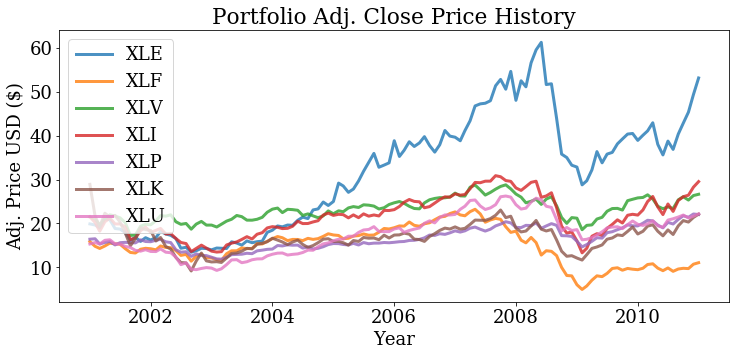

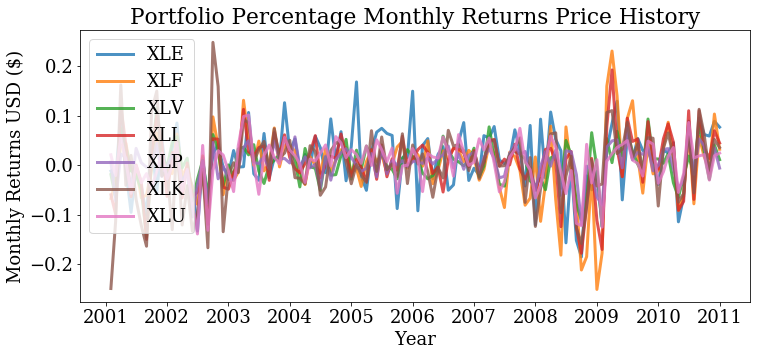

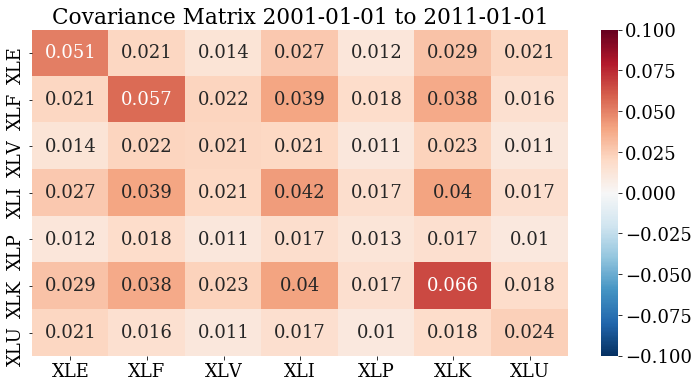

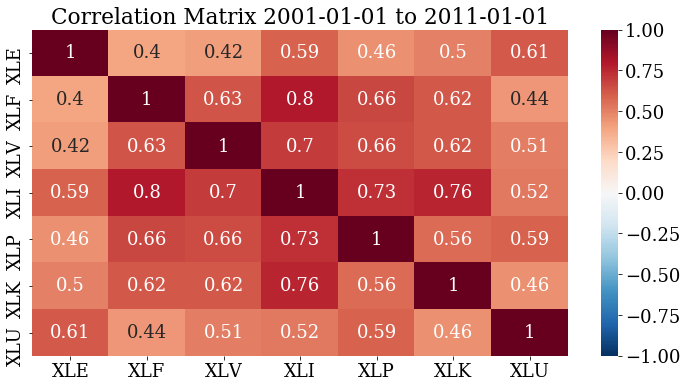

Portfolio weights:
0.14285714285714285 XLE
0.14285714285714285 XLF
0.14285714285714285 XLV
0.14285714285714285 XLI
0.14285714285714285 XLP
0.14285714285714285 XLK
0.14285714285714285 XLU

Expected portfolio variance:   0.0238
Expected portfolio volatility: 0.1542
Expected portfolio simple yearly return: 0.0422

Annual variance: 2.3800000000000003%
Annual volatility: 15.42%
Expected yearly return: 4.22%


In [6]:
'''Example of what the loop in the cell below outputs'''

"""Read data"""
rolling_no = 0
stocks, stock_prices = roll_port(rolling_no)
returns = stock_prices.pct_change()

# Visualise
plt.figure(figsize=(12,5)) 
for x in stock_prices.columns.values:
    plt.plot(stock_prices[x], lw=3, alpha=0.8, label=x)
plt.title('Portfolio Adj. Close Price History')
plt.xlabel('Year',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(stock_prices.columns.values, loc='best')
plt.show();

plt.figure(figsize=(12, 5))
for x in stock_prices.pct_change().columns.values:
    plt.plot(returns.index, returns[x], lw=3, alpha=0.8, label=x)
plt.title('Portfolio Percentage Monthly Returns Price History')
plt.xlabel('Year',fontsize=18)
plt.ylabel('Monthly Returns USD ($)',fontsize=18)
plt.legend(stock_prices.pct_change().columns.values, loc='best')
plt.show();

##########################################################################################################################

'''Daily simple returns = new price/old price - 1'''
returns = stock_prices.pct_change()

'''Covariance matrix'''
cov_matrix_annual = returns.cov() * 12 
cor_matrix_annual = returns.corr() 
#print("Covariance:")
#display(cov_matrix_annual)
plt.figure(figsize=(12, 6))
ax = plt.axes()
#cmap = sns.color_palette("ch:start=.2,rot=-.3")
sns.heatmap(cov_matrix_annual,cmap='RdBu_r',annot=True,vmin=-0.1, vmax=0.1,ax = ax)
ax.set_title(f'Covariance Matrix {years[rolling_no]}-01-01 to {years[10+rolling_no]}-01-01')
plt.savefig(f'CovMat{years[rolling_no]}_{years[10+rolling_no]}.PNG')
plt.show()

plt.figure(figsize=(12, 6))
ax = plt.axes()
#cmap = sns.color_palette("ch:start=.2,rot=-.3")
sns.heatmap(cor_matrix_annual,cmap='RdBu_r',annot=True,vmin=-1, vmax=1,ax = ax)
ax.set_title(f'Correlation Matrix {years[rolling_no]}-01-01 to {years[10+rolling_no]}-01-01')
plt.savefig(f'CorMat{years[rolling_no]}_{years[10+rolling_no]}.PNG')
plt.show()

###########################################################################################################################

'''Weight assignment'''
weights = 1/len(stocks)*np.ones(len(stocks))
print("Portfolio weights:")
for i in range(len(stocks)):
    print(weights[i],stock_prices.columns.values[i])
if np.round(np.sum(weights),10) != 1:
    print(f"Warning: Sum of weights is not 1!")

"""Expected portfolio variance, volatility and annual return"""
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
print(f"\nExpected portfolio variance:   {np.round(port_variance,4)}")

port_volatility = np.sqrt(port_variance) #standard deviation/risk
print(f"Expected portfolio volatility: {np.round(port_volatility,4)}")

portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 12 
print(f"Expected portfolio simple yearly return: {np.round(portfolioSimpleAnnualReturn,4)}")

percent_var = str(round(port_variance, 4) * 100) + '%'
percent_vols = str(round(port_volatility, 4) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 4)*100)+'%'
print('\nAnnual variance: '+percent_var)
print('Annual volatility: '+percent_vols)
print("Expected yearly return: "+ percent_ret)

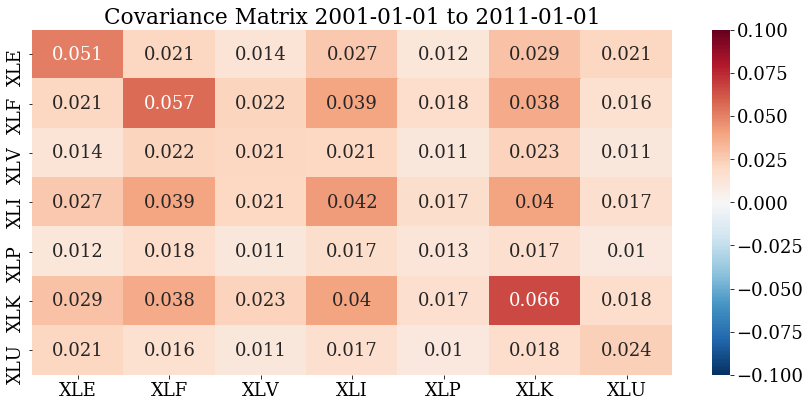

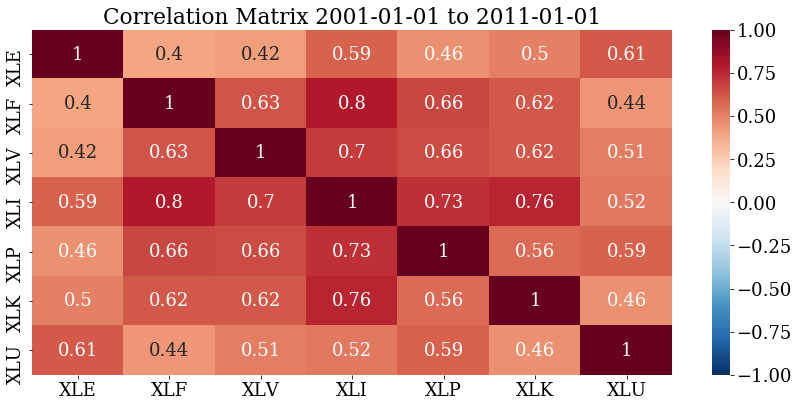

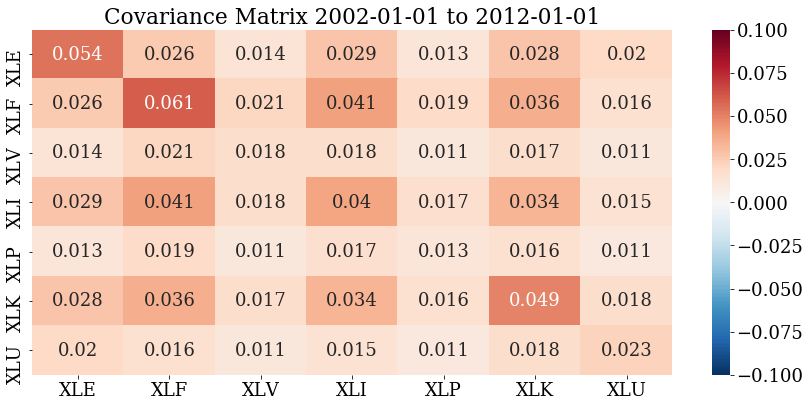

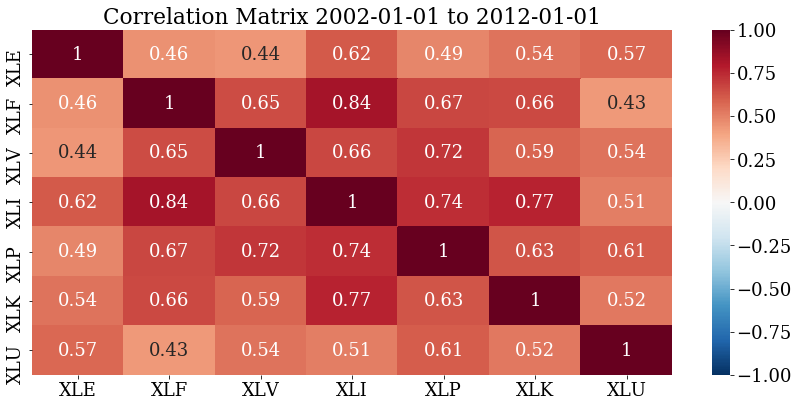

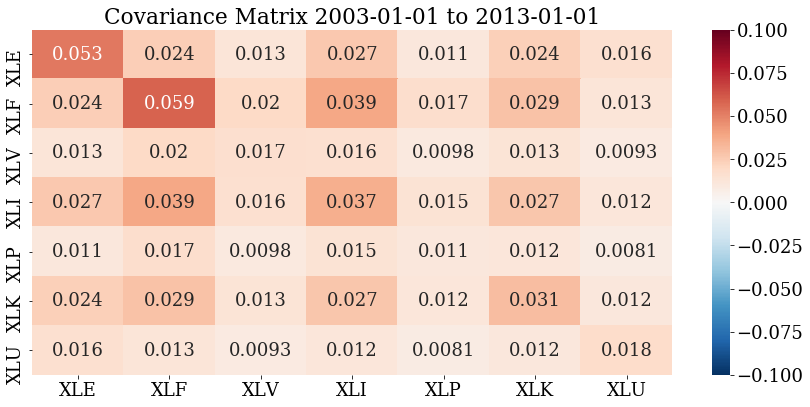

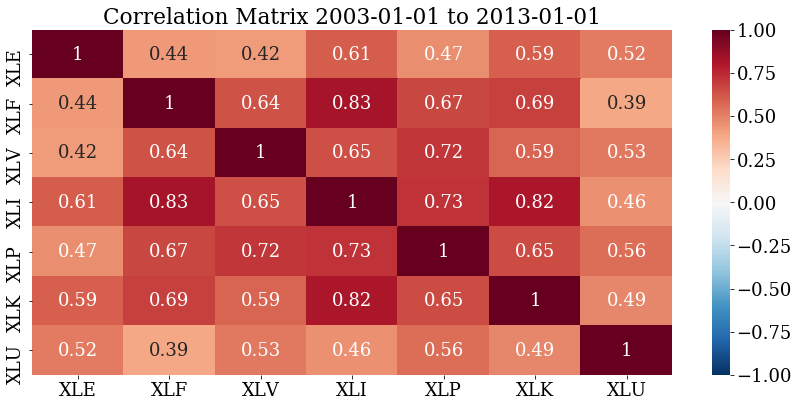

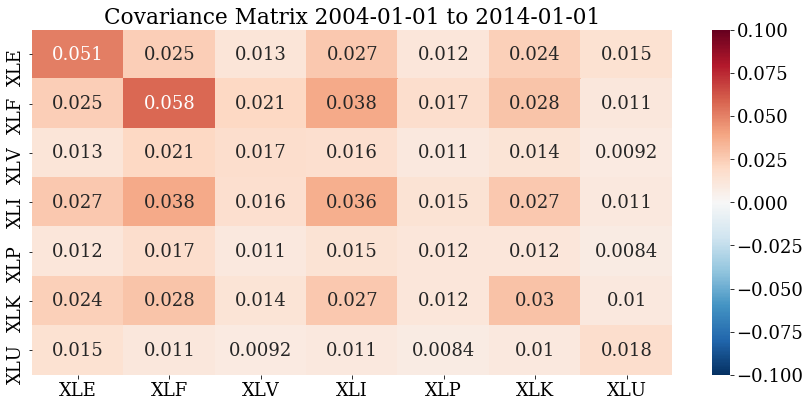

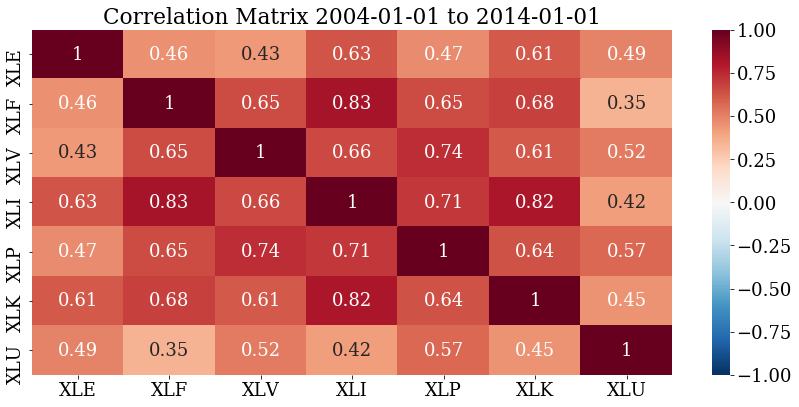

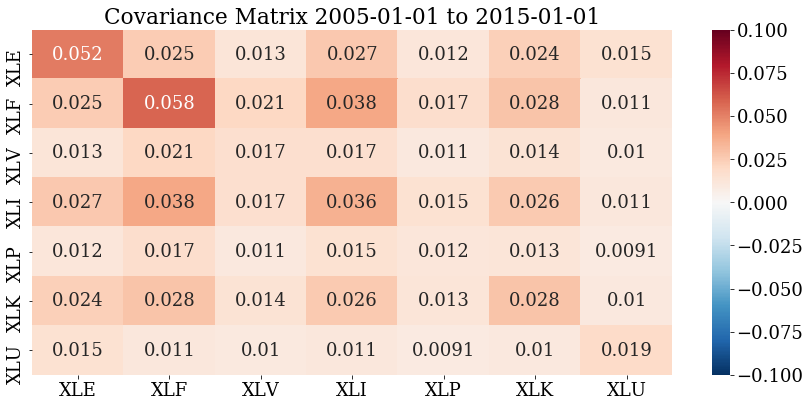

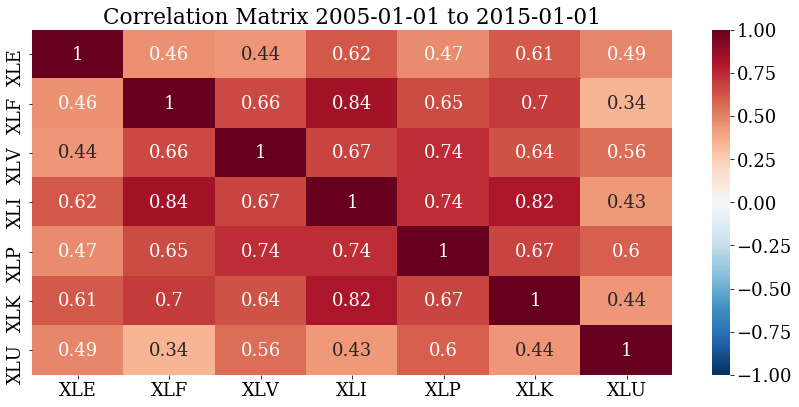

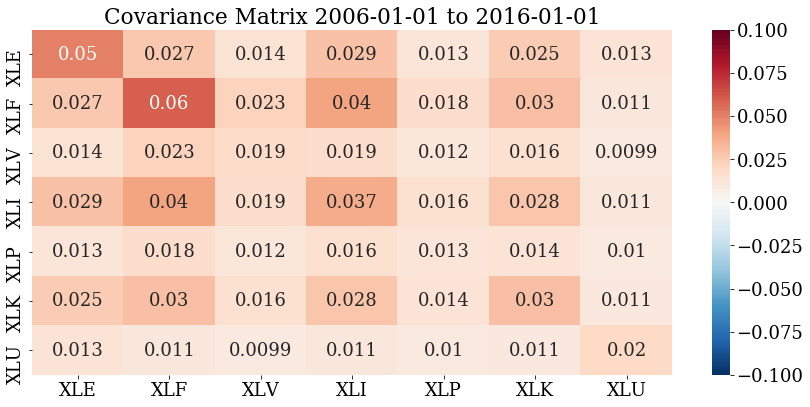

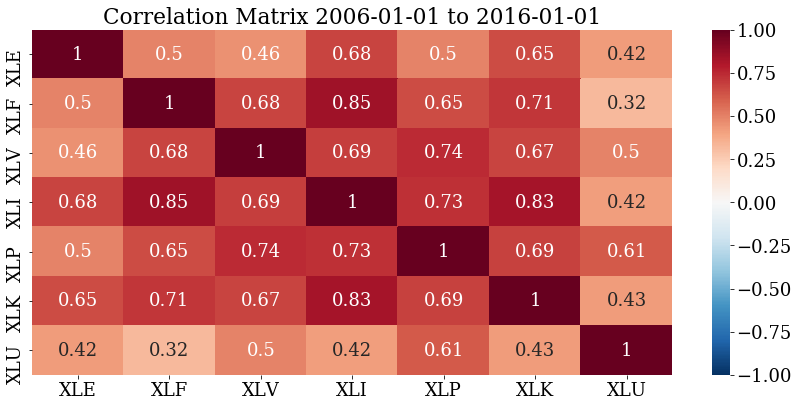

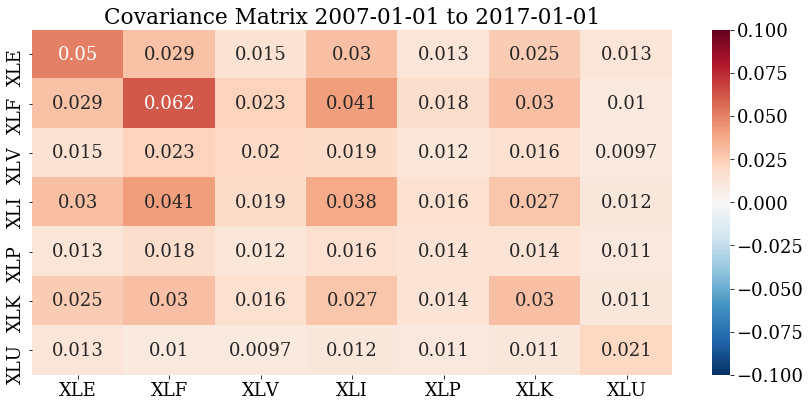

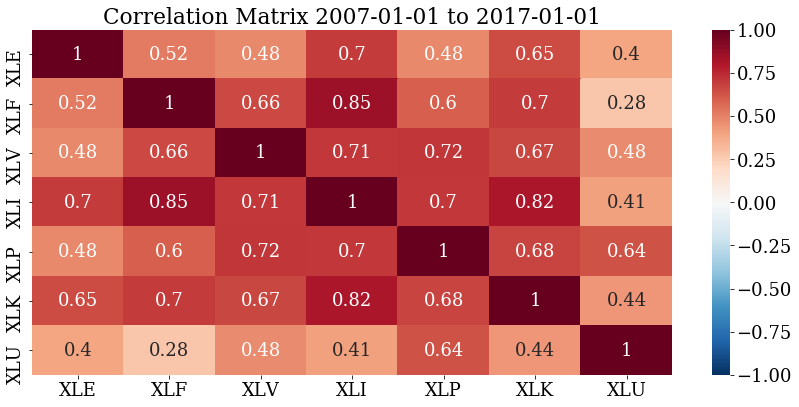

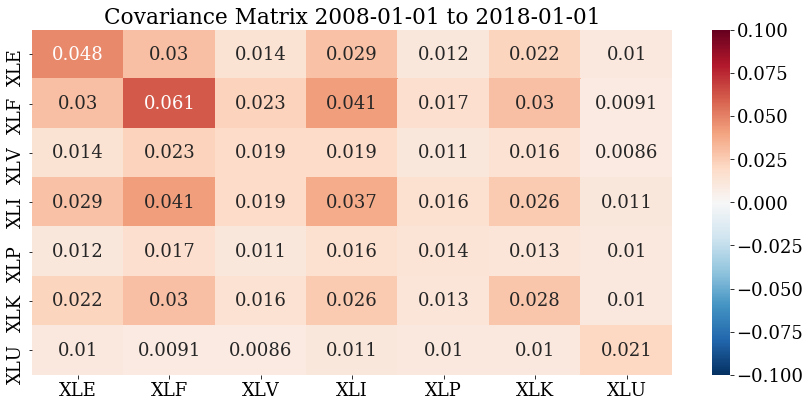

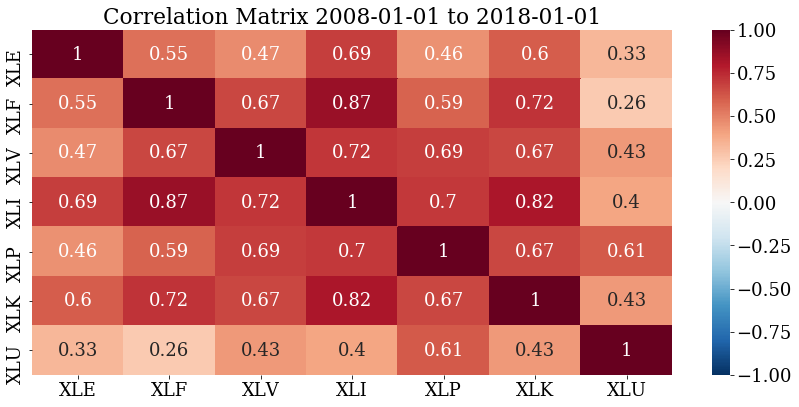

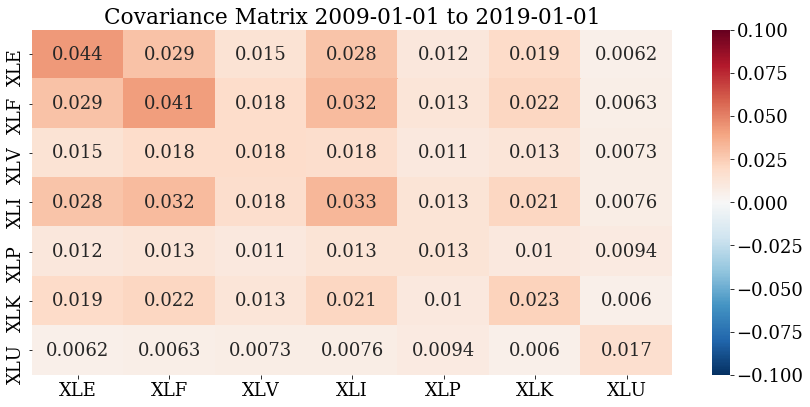

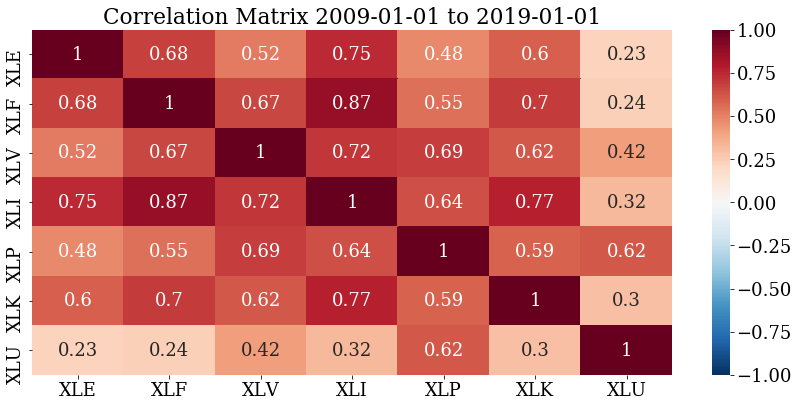

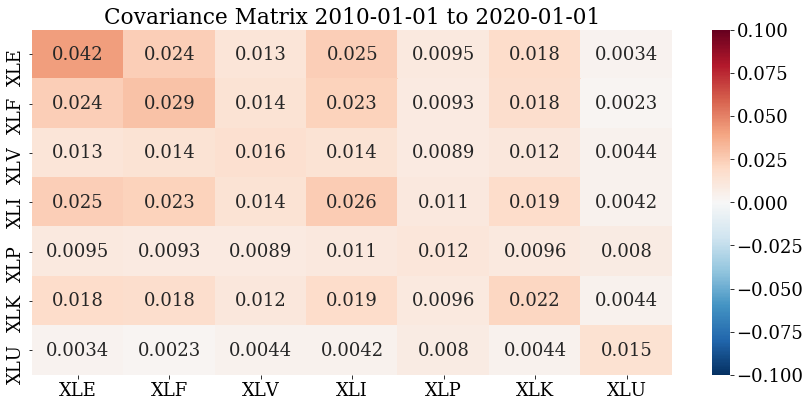

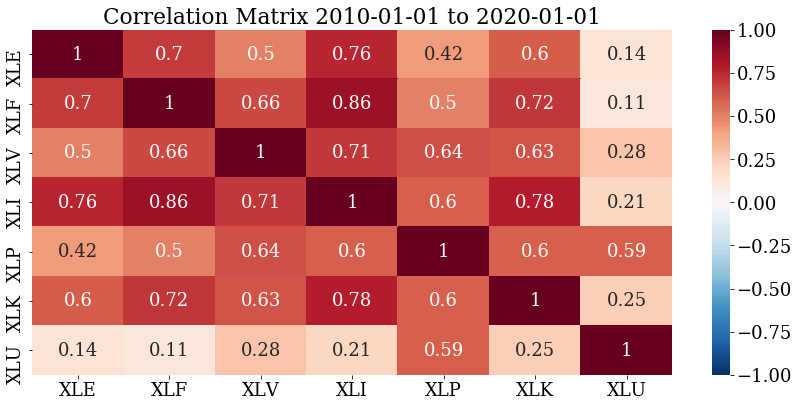

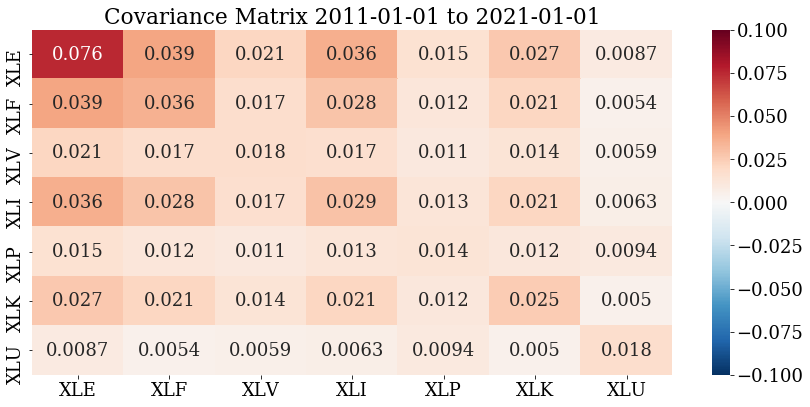

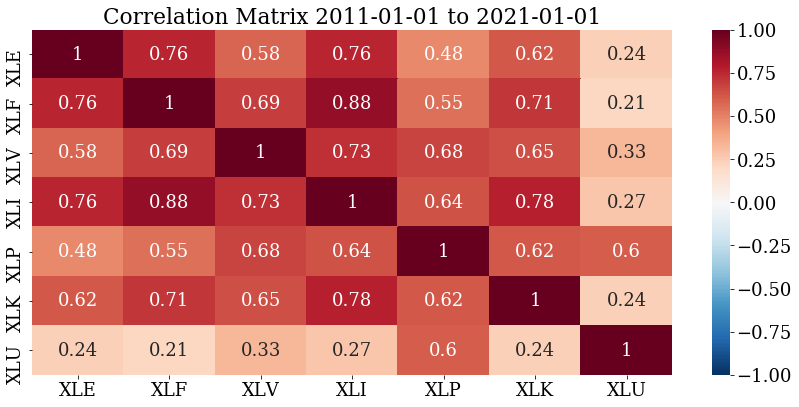

In [7]:
'''Saves all 11 covariance matrices as images and appends resulting risk and returns for each window to lists'''

vol = [] # empty array to hold volatility
ret = [] # empty array to hold return
pvol = [] # empty array to hold percentage volatility
pret = [] # empty array to hold percentage return

for i in range(11):
    """Read data"""
    rolling_no = i
    stocks, stock_prices = roll_port(rolling_no)

    ##########################################################################################################################

    '''Daily simple returns = new price/old price - 1'''
    returns = stock_prices.pct_change()

    '''Covariance matrix'''
    cov_matrix_annual = returns.cov() * 12
    
    plt.figure(figsize=(12, 6))
    ax = plt.axes()
    sns.heatmap(cov_matrix_annual,cmap='RdBu_r',annot=True,vmin=-0.1, vmax=0.1,ax = ax)
    ax.set_title(f'Covariance Matrix {years[rolling_no]}-01-01 to {years[10+rolling_no]}-01-01')
    plt.tight_layout()
    plt.savefig(f'CovMat{years[rolling_no]}_{years[10+rolling_no]}.PNG')
    plt.show()
    
    '''Correlation matrix'''
    cor_matrix_annual = returns.corr()
    plt.figure(figsize=(12, 6))
    ax = plt.axes()
    sns.heatmap(cor_matrix_annual,cmap='RdBu_r',annot=True,vmin=-1, vmax=1,ax = ax)
    ax.set_title(f'Correlation Matrix {years[rolling_no]}-01-01 to {years[10+rolling_no]}-01-01')
    plt.tight_layout()
    plt.savefig(f'CorMat{years[rolling_no]}_{years[10+rolling_no]}.PNG')
    plt.show()

    ###########################################################################################################################

    '''Weight assignment'''
    weights = 1/len(stocks)*np.ones(len(stocks))

    """Expected portfolio variance, volatility and annual return"""
    port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
    port_volatility = np.sqrt(port_variance) #standard deviation/risk
    vol.append(port_volatility)

    portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 12 
    ret.append(portfolioSimpleAnnualReturn)

    percent_var = port_variance*100 
    percent_vols = port_volatility*100 
    pvol.append(percent_vols)
    percent_ret = portfolioSimpleAnnualReturn*100 
    pret.append(percent_ret)

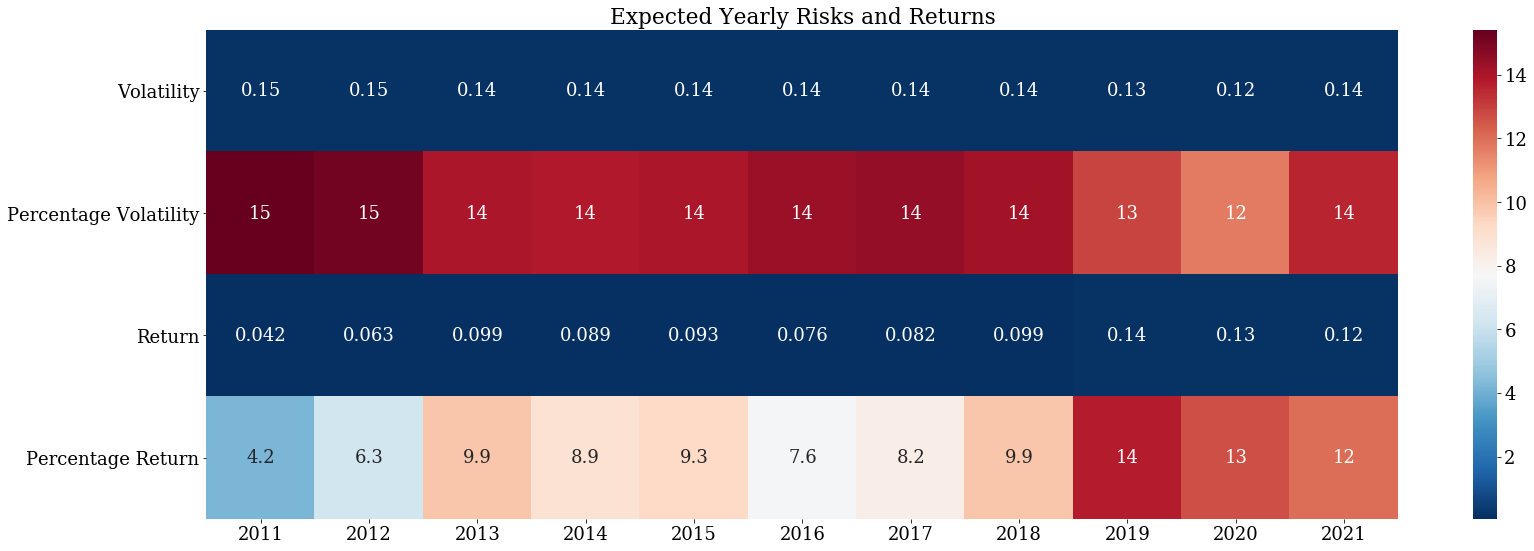

In [8]:
"""Print the 11 resulting risk and return values"""

# print("Risk:",np.round(vol,3))
# print("Return:",np.round(ret,3))
# print("Percentage Risk",pvol)
# print("Percentage Return",pret)

"""Put the 11 resulting risk and return values in dataframe"""
riskreward = pd.DataFrame({'Volatility': vol, 'Percentage Volatility': pvol, 'Return': ret, 'Percentage Return': pret})
riskreward.index = [years[10],years[11],years[12],years[13],years[14],years[15],years[16],years[17],years[18],years[19],years[20]] 
#riskreward

'''Save the resulting risk and return dataframe as png'''
plt.figure(figsize=(24,8))
ax = plt.axes()
sns.heatmap(riskreward.T,cmap='RdBu_r',annot=True,ax = ax)
ax.set_title(f'Expected Yearly Risks and Returns')
plt.tight_layout()
plt.savefig(f'riskreturns.PNG')
plt.show()

### 1c) Efficient Frontier

In [9]:
from functools import reduce
# Create and save 20000 randomly weighted portfolios for each of the 11 rolling windows, takes around 7 min to run
rolling_window = 10

pf_data = pd.DataFrame()
assets = ['XLE', 'XLF', 'XLV', 'XLI', 'XLP', 'XLK', 'XLU']
l = len(assets)
for i in range(11):
    pf_data = pd.DataFrame()
    for x in assets:
        pf_data[x] = web.data.get_data_yahoo(x,start=years[i]+'-01-01', end = years[i+rolling_window]+'-01-01',interval='m')['Adj Close']    
        
    returns = np.log(pf_data / pf_data.shift(1)) #dataframe class
    mean = returns.mean() * 12
    cov = returns.cov() * 12

    rtn = []
    sds = []
    wgts = []
    for _ in range(20000):
        wgt = np.random.rand(l)
        wgt /= sum(wgt)
        rtn.append(sum(mean * wgt))
        sds.append(np.sqrt(reduce(np.dot, [wgt, cov, wgt.T])))
        wgts.append(wgt)
    
    data = {'Returns':rtn, 'Volatility':sds}
    for counter, symbol in enumerate(pf_data.columns.tolist()):
        data[symbol+' weight'] = [w[counter] for w in wgts]
    pd.DataFrame(data).to_csv(f'portfolio{i}.csv')

In [10]:
# Load saved portfolios
portfolios = {}
for i in range(11):
    portfolios[f"portfolio{i}"] = pd.read_csv(f'portfolio{i}.csv').drop(columns=['Unnamed: 0'])

In [11]:
# Print optimal weights for given rolling window
port_id = 10 #choose rolling window
port = portfolios[f'portfolio{port_id}']   
'''Minimum volatility portfolio'''
min_vol_port = port.iloc[port['Volatility'].idxmin()]
'''Optimal portfolio'''
rf = 0.01 # risk-free rate
optimal_risky_port = port.iloc[((port['Returns']-rf)/port['Volatility']).idxmax()]

optimal_risky_port

Returns       0.133797
Volatility    0.109201
XLE weight    0.008125
XLF weight    0.016652
XLV weight    0.220424
XLI weight    0.002770
XLP weight    0.203951
XLK weight    0.280503
XLU weight    0.267575
Name: 5359, dtype: float64

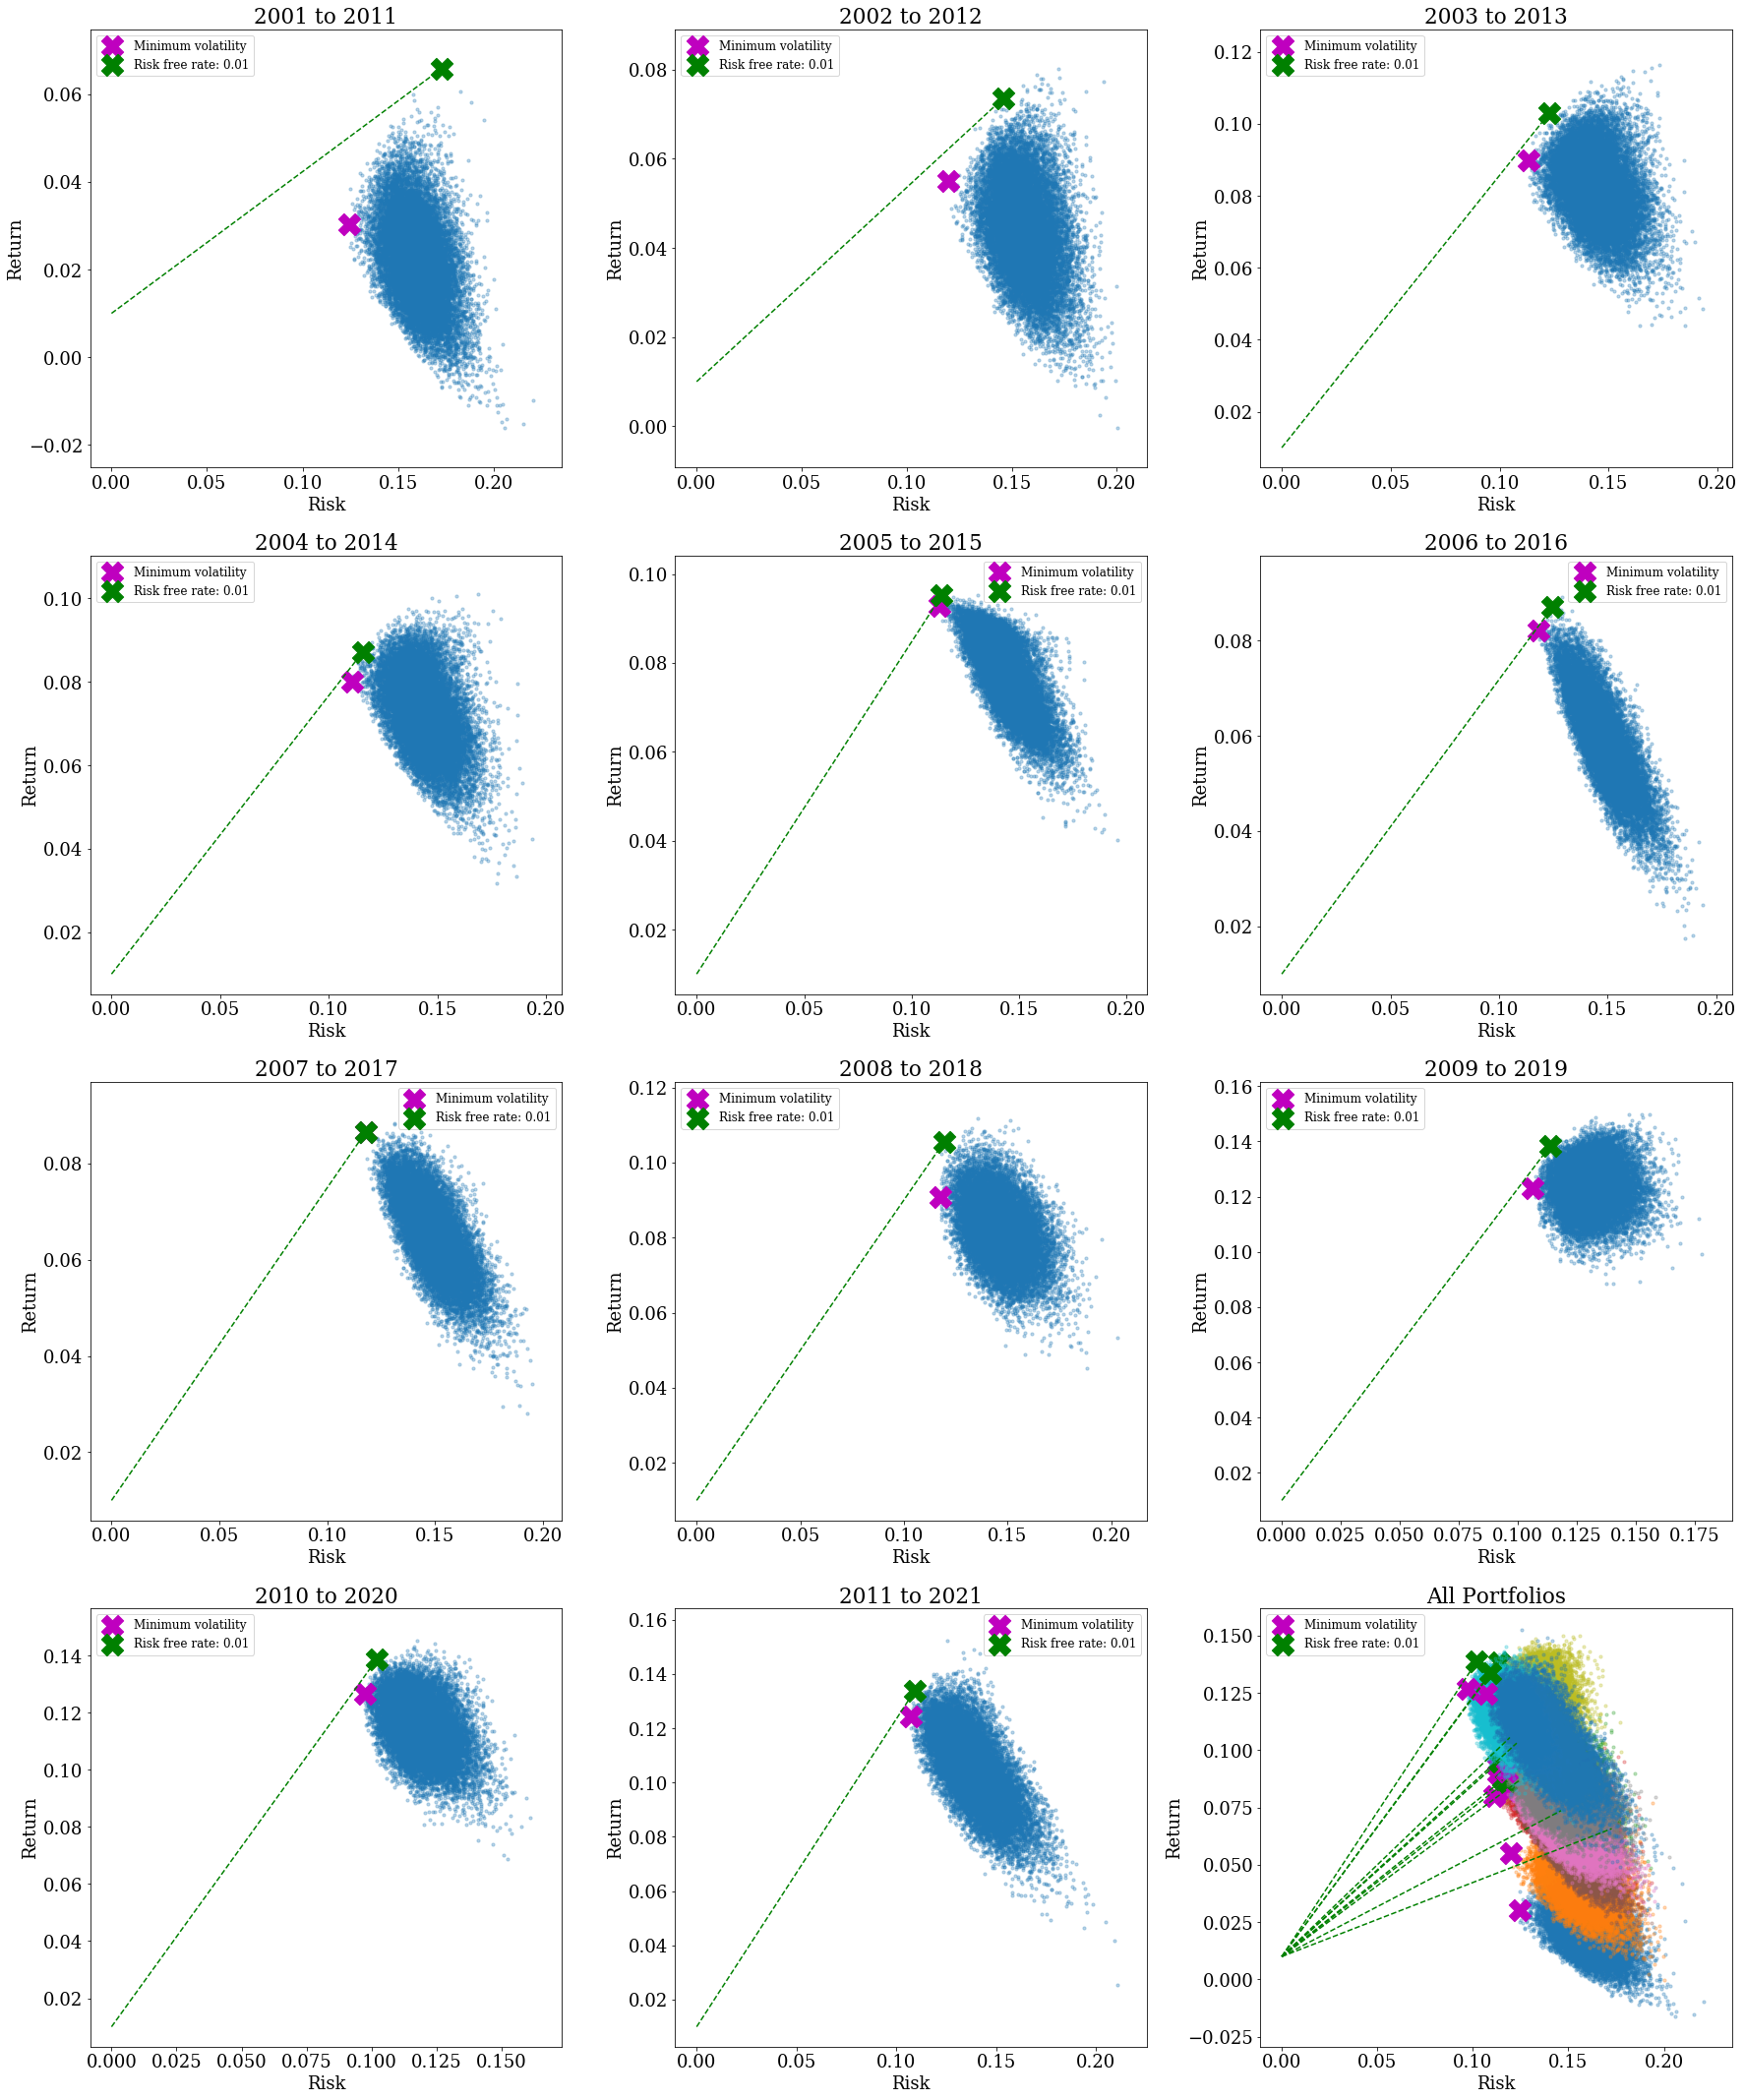

In [12]:
# Visualise EF with minimum volatility and optimal risky portfolios
fig, axes = plt.subplots(4,3, figsize=(25, 30))
for i,ax in zip(range(11),np.ravel(axes)):
    port = portfolios[f'portfolio{i}']
    
    '''Minimum volatility portfolio'''
    min_vol_port = port.iloc[port['Volatility'].idxmin()]

    '''Optimal portfolio'''
    rf = 0.01 # risk-free rate
    optimal_risky_port = port.iloc[((port['Returns']-rf)/port['Volatility']).idxmax()]

    '''Plot optimal portfolio'''
    #ax.set_title(f'portfolio{i}')
    ax.set_title(f'{years[i]} to {years[10+i]}')
    ax.scatter(port['Volatility'], port['Returns'],marker='o', s=10, alpha=0.3)
    ax.scatter(min_vol_port[1], min_vol_port[0], color='m', marker='X', s=500, label="Minimum volatility",)
    ax.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='X', s=500,label=f'Risk free rate: {rf}')
    ax.plot([0,optimal_risky_port[1]],[rf,optimal_risky_port[0]],color='g',linestyle='--')
    ax.set_xlabel("Risk"); ax.set_ylabel("Return");
    ax.legend(loc='best',fontsize=12)
    
axes.flatten()[11].set_title('All Portfolios')
axes.flatten()[11].set_xlabel("Risk"); axes.flatten()[11].set_ylabel("Return");
for i in range(11):
    port = portfolios[f'portfolio{i}']
    
    '''Minimum volatility portfolio'''
    min_vol_port = port.iloc[port['Volatility'].idxmin()]

    '''Optimal portfolio'''
    rf = 0.01 # risk-free rate
    optimal_risky_port = port.iloc[((port['Returns']-rf)/port['Volatility']).idxmax()]

    '''Plot optimal portfolio'''
    axes.flatten()[11].scatter(port['Volatility'], port['Returns'],marker='o', s=10, alpha=0.3)
    axes.flatten()[11].scatter(min_vol_port[1], min_vol_port[0], color='m', marker='X', s=500, label="Minimum volatility" if i == 0 else "_nolegend_")
    axes.flatten()[11].scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='X', s=500, label=f'Risk free rate: {rf}' if i == 0 else "_nolegend_")
    axes.flatten()[11].plot([0,optimal_risky_port[1]],[rf,optimal_risky_port[0]],color='g',linestyle='--')

axes.flatten()[11].legend(loc='best',fontsize=12)

plt.tight_layout()
plt.savefig("portfoliosefwrf22.png")
plt.show();

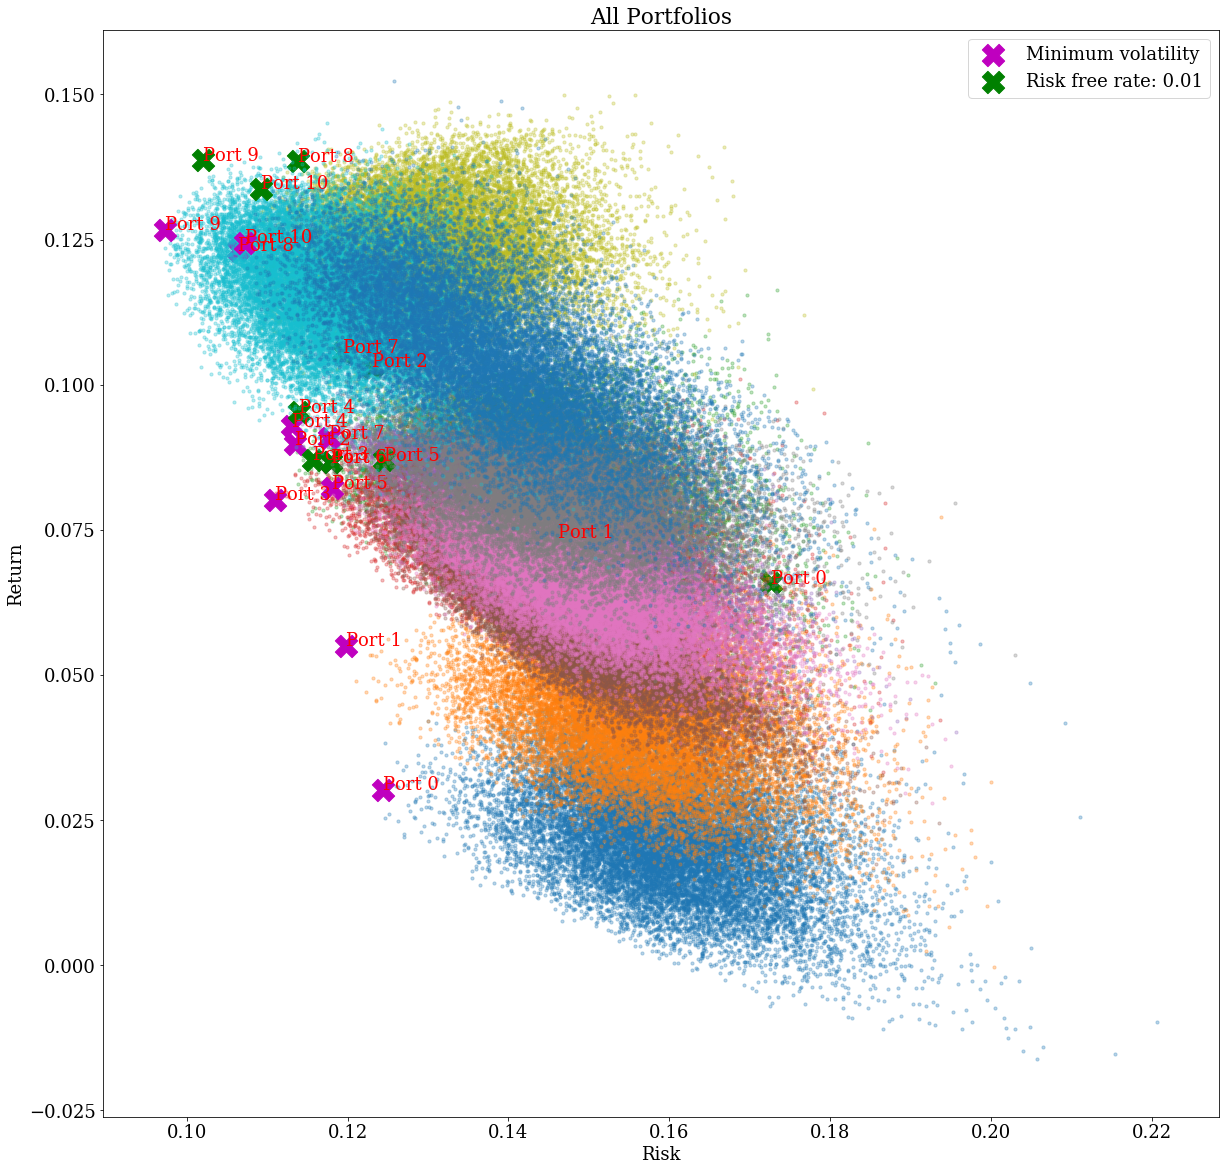

In [13]:
# Visualise all portfolios in bigger plot

fig, axes = plt.subplots(figsize=(20, 20))    
axes.set_title('All Portfolios')
axes.set_xlabel("Risk"); plt.ylabel("Return");
for i in range(11):
    port = portfolios[f'portfolio{i}']
    
    '''Minimum volatility portfolio'''
    min_vol_port = port.iloc[port['Volatility'].idxmin()]

    '''Optimal portfolio'''
    rf = 0.01 # risk-free rate
    optimal_risky_port = port.iloc[((port['Returns']-rf)/port['Volatility']).idxmax()]

    '''Plot optimal portfolio'''
    axes.scatter(port['Volatility'], port['Returns'],marker='o', s=10, alpha=0.3)
    axes.scatter(min_vol_port[1], min_vol_port[0], color='m', marker='X', s=500, label="Minimum volatility" if i == 0 else "_nolegend_")
    axes.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='X', s=500, label=f'Risk free rate: {rf}' if i == 0 else "_nolegend_")
    axes.text(min_vol_port[1], min_vol_port[0], f'Port {i}', color='r', fontsize=18)
    axes.text(optimal_risky_port[1], optimal_risky_port[0], f'Port {i}', color='r', fontsize=18)
axes.legend()
plt.show();

### 1e) Asset Allocation

Percentage invested on portfolio = 1.728 with expected return rate 0.12


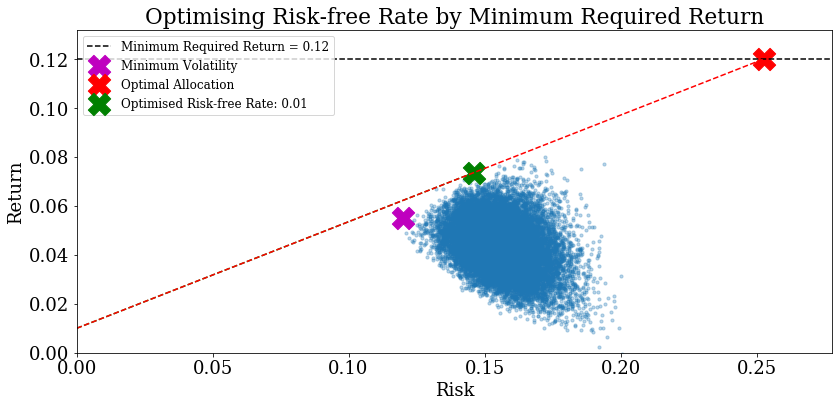

In [14]:
# Example
wport = portfolios["portfolio1"] #Testportfolio

'''Initial Optimal Portfolio'''
rf = 0.01
slope = (wport['Returns']-rf)/wport['Volatility']
optimal_risky_port = wport.iloc[slope.idxmax()] #shape ratio
#orig_risky_port = wport.iloc[slope.idxmax()]
min_vol_port =  wport.iloc[wport['Volatility'].idxmin()]
min_return = 0.12
X_test = (min_return - rf)/(optimal_risky_port[0] - rf)
sig_c = X_test * optimal_risky_port[1]
"Minimum Return Optimal Portfolio"
print(f"Percentage invested on portfolio = {np.round(X_test,3)} with expected return rate {np.round(min_return,3)}")

'''while optimal_risky_port[0] < min_return:
    rf += 0.001
    optimal_risky_port = wport.iloc[((wport['Returns']-rf)/wport['Volatility']).idxmax()]
    if optimal_risky_port[0] < orig_risky_port[0]:
        print("Minimum Return Rate not possible.")
        break
print(f"Expected return = {np.round(optimal_risky_port[0],3)} at risk-free rate {np.round(rf,3)}")'''

'''Visualise'''
plt.figure(figsize=(12,6))
plt.xlim(0,max(wport['Volatility'].max()+wport['Volatility'].max()/10, sig_c + sig_c/10))
plt.ylim(0,max(wport['Returns'].max()+wport['Returns'].max()/10, min_return + min_return/10))
plt.title("Optimising Risk-free Rate by Minimum Required Return")
plt.scatter(wport['Volatility'], wport['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='m', marker='X', s=500, label='Minimum Volatility')
plt.scatter(sig_c , min_return, color='r', marker='X', s=500, label='Optimal Allocation')
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='X', s=500, label=f'Optimised Risk-free Rate: {np.round(rf,3)}')
plt.axhline(min_return,color='k',linestyle='--',label=f"Minimum Required Return = {min_return}")
plt.plot([0,optimal_risky_port[1]],[rf,optimal_risky_port[0]],color='g',linestyle='--')
plt.plot([0,sig_c],[rf,min_return],color='r',linestyle='--')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.legend(loc='best',fontsize=12)
plt.tight_layout()
plt.savefig("1eindxexample.png")
plt.show();

#print(f"Changes:\n{optimal_risky_port-orig_risky_port}")

Percentage invested on portfolio = 1.972 with expected return rate 0.12 for rolling window1
Optimised Expected return = 0.066 at risk-free rate 0.01 for portfolio0
Percentage invested on portfolio = 1.728 with expected return rate 0.12 for rolling window2
Optimised Expected return = 0.074 at risk-free rate 0.01 for portfolio1
Percentage invested on portfolio = 1.181 with expected return rate 0.12 for rolling window3
Optimised Expected return = 0.103 at risk-free rate 0.01 for portfolio2
Percentage invested on portfolio = 1.427 with expected return rate 0.12 for rolling window4
Optimised Expected return = 0.087 at risk-free rate 0.01 for portfolio3
Percentage invested on portfolio = 1.291 with expected return rate 0.12 for rolling window5
Optimised Expected return = 0.095 at risk-free rate 0.01 for portfolio4
Percentage invested on portfolio = 1.43 with expected return rate 0.12 for rolling window6
Optimised Expected return = 0.087 at risk-free rate 0.01 for portfolio5
Percentage invest

C:\Users\annax\Documents\temp\lib\site-packages\ipykernel_launcher.py:65: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


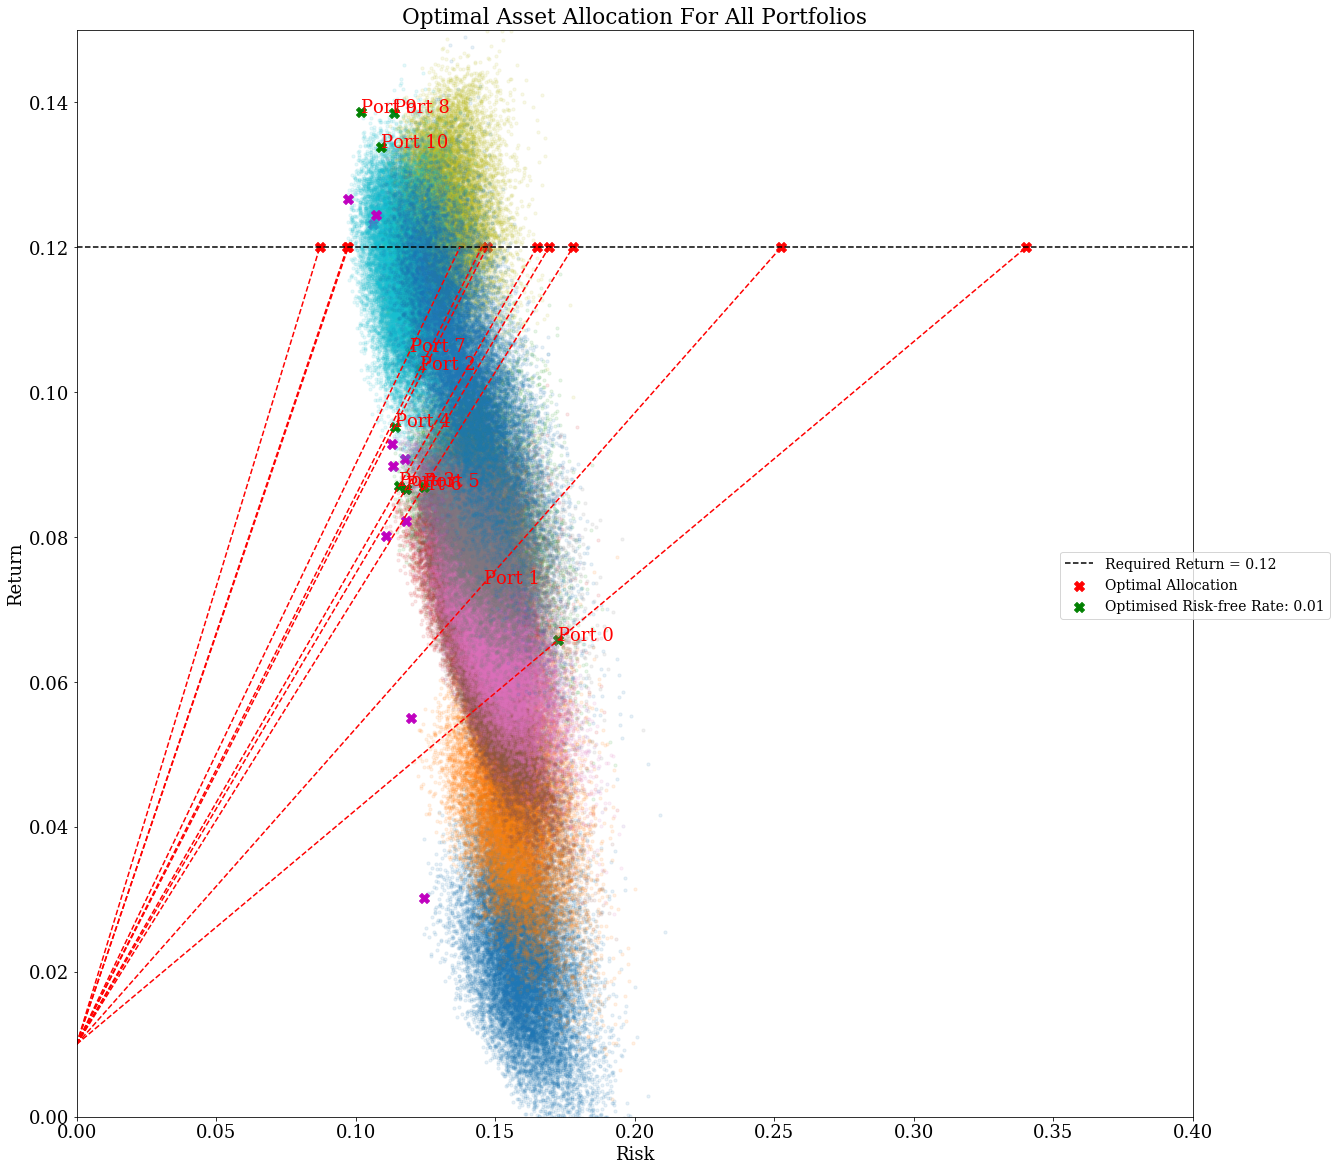

In [15]:
# Do all 11
rf = 0.01
R_e = 0.12 # fixed expected return
R_a = []
w = [] # asset weights in a portfolio
X = []
sig_a = []   # risk of portfolio a
sig_c = []  # risk of the combination
ind_list = []


t0 = time()
fig, axes = plt.subplots(figsize=(20, 20)) 
axes.set_xlim(0,0.4),axes.set_ylim(0,0.15)
axes.axhline(R_e,color='k',linestyle='--',label=f"Required Return = {R_e}")
axes.set_title('Optimal Asset Allocation For All Portfolios')
axes.set_xlabel("Risk"); plt.ylabel("Return");

for i in range(11):
    wport = portfolios[f'portfolio{i}']

    slope = (wport['Returns']-rf)/wport['Volatility'] #shape ratio
    optimal_risky_port = wport.iloc[slope.idxmax()]
    min_vol_port =  wport.iloc[wport['Volatility'].idxmin()]
    R_a.append(optimal_risky_port[0])
    X.append((R_e - rf)/(R_a[-1] - rf))
    sig_a.append(optimal_risky_port[1])
    sig_c.append(X[-1] * sig_a[-1])
    w.append(optimal_risky_port[2:].array)
    print(f"Percentage invested on portfolio = {np.round(X[-1],3)} with expected return rate {R_e} for rolling window{i+1}")
            
#     # Plot the portfolios that do not reach chosen RR
#     if optimal_risky_port[0] < orig_risky_port[0]:
#         axes.scatter(wport['Volatility'], wport['Returns'],marker='o', s=10, alpha=0.1)
#         axes.scatter(min_vol_port[1], min_vol_port[0], color='m', marker='X', s=500, label="_nolegend_")
#         axes.scatter(orig_risky_port[1], orig_risky_port[0], color='r', marker='X', s=500, label="_nolegend_")
#         axes.scatter(optimal_risky_port[1], optimal_risky_port[0], c='c', marker='X', s=500, label=f'Optimised Risk-free Rate (RR not Reached)' if i == 0 else "_nolegend_") #: {np.round(rf,3)}')

#         axes.text(min_vol_port[1], min_vol_port[0], f'Port {i}', color='r', fontsize=18)
#         axes.text(optimal_risky_port[1], optimal_risky_port[0], f'Port {i}', color='r', fontsize=18)
#         axes.text(orig_risky_port[1], orig_risky_port[0], f'Port {i}', color='r', fontsize=18)
        
    # Plot the portfolios that do reach chosen RR
    ind_list.append(i)
    print(f"Optimised Expected return = {np.round(optimal_risky_port[0],3)} at risk-free rate {np.round(rf,3)} for portfolio{i}")
    '''Visualise'''        
    axes.scatter(wport['Volatility'], wport['Returns'],marker='o', s=10, alpha=0.1)
    axes.scatter(min_vol_port[1], min_vol_port[0], color='m', marker='X', s=100)
    axes.scatter(sig_c[-1] , R_e, color='r', marker='X', s=100, label='Optimal Allocation' if i == 10 else "_nolegend_")
    axes.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='X', s=100, label=f'Optimised Risk-free Rate: {rf}'if i == 10 else "_nolegend_")
    #axes.plot([0,optimal_risky_port[1]],[rf,optimal_risky_port[0]],color='g',linestyle='--')
    axes.plot([0,sig_c[-1]],[rf,R_e],color='r',linestyle='--')
    
    '''axes.scatter(wport['Volatility'], wport['Returns'],marker='o', s=10, alpha=0.1)
    axes.scatter(orig_risky_port[1], orig_risky_port[0], color='r', marker='X', s=500, label='Original Risk-free Rate: 0' if i == 10 else "_nolegend_")
    axes.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='X', s=500, label=f'Optimised Risk-free Rate' if i == 10 else "_nolegend_") #: {np.round(rf,3)}')
    axes.scatter(min_vol_port[1], min_vol_port[0], color='m', marker='X', s=500, label='Minimum Volatility' if i == 10 else "_nolegend_")'''

    #axes.text(min_vol_port[1], min_vol_port[0], f'Port {i}', color='r', fontsize=18)
    axes.text(optimal_risky_port[1], optimal_risky_port[0], f'Port {i}', color='r', fontsize=18)
    #axes.text(orig_risky_port[1], orig_risky_port[0], f'Port {i}', color='r', fontsize=18)

    
fig.legend(loc='center right',fontsize=14)
fig.show();
t1 = time()
print(f'Wall time: {t1-t0} s')

In [16]:
turnover = []
for i in range(len(X)-1):
    turnover.append(sum(abs(X[i+1] * w[i+1] - X[i] * w[i])) + abs(X[i] - X[i+1]))
turnover

[1.182533442970397,
 1.350404693390853,
 0.8911256991273546,
 0.7262353842674167,
 1.1615044833760635,
 0.6730119000331644,
 0.680798576536039,
 1.4488930192188276,
 0.45269017860036465,
 0.4759047153401327]

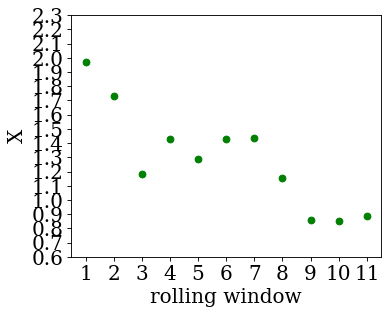

In [17]:
plt.figure(figsize=(5, 4), dpi=80)
plt.scatter(np.arange(1,12), X ,color = "g")
plt.xlabel('rolling window')
plt.ylabel('X')
plt.xticks(np.arange(1,12))
plt.yticks(np.arange(0.6,  max(X) + 0.4, 0.1))
plt.show()

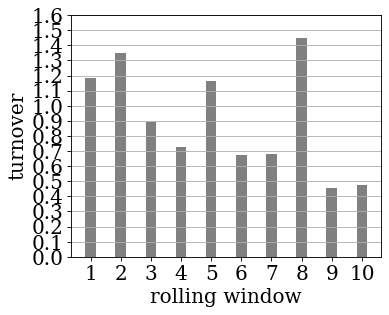

In [18]:
plt.figure(figsize=(5, 4), dpi=80)
plt.grid(axis = 'y')
plt.bar(ind_list[1:], turnover,width = 0.35, color = "gray")
plt.xlabel('rolling window')
plt.ylabel('turnover')
plt.xticks(ind_list[1:])
plt.yticks(np.arange(0,  max(turnover) + 0.2, 0.1))

plt.show()

### 1f) Backtest

In [19]:
#backtest
# calculate yearly return without rolling
# since the first rolling window ends on 2011-01-01, we can backtest only from 2011
stocks_last, stock_prices_last = roll_port(10)
returns_last = stock_prices_last.pct_change()
#annual mean return from 2011 to 2020(2021-01-01)  # 10-year-data
annual_returns = []
annual_cov = []
for i in range(10):   #the last rolling window was excluded
    annual_cov.append((returns_last[i*12:(i+1)*12+1].cov()*12).values)   # time 12?  or time sqrt(12)?
    annual_returns.append(returns_last[i*12:(i+1)*12+1].mean().array)   #the index corresponding the rolling window inde where the parameters were calculated

#return out of sample
#port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))

R_out = []
vol_out = []
for i in range(len(X)):
    if i > 9:     #we cannot do backtest for the last rolling window?
        break
    out =(1 - X[i]) * rf + X[i] * np.dot(w[i],annual_returns[i])   #annual_returns[0] corresponding 2011
    R_out.append(out)
    w[i] = np.array(w[i])
    std = np.sqrt(np.dot(w[i].T, np.dot(annual_cov[i], w[i])))
    vol_out.append(std)

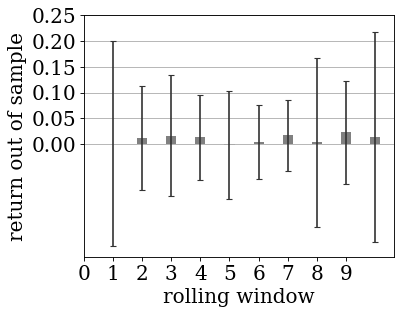

In [20]:
plt.figure(figsize=(5, 4), dpi=80)
plt.grid(axis = 'y')
plt.bar(ind_list[1:], R_out, yerr = vol_out, error_kw = {'ecolor' : '0.2', 'capsize' :3}, width = 0.35, color = "gray")
#plt.bar(ind_list[: -1], R_out, width = 0.35, color = "gray")
plt.xlabel('rolling window')
plt.ylabel('return out of sample')
plt.xticks(ind_list[: -1])
plt.yticks(np.arange(0,  0.3, 0.05))

plt.show()

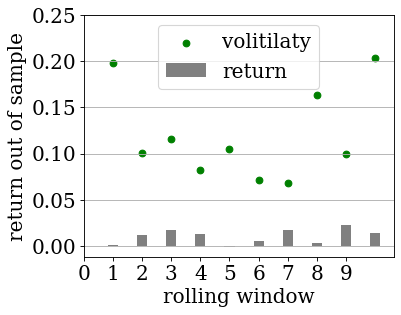

In [21]:
plt.figure(figsize=(5, 4), dpi=80)
plt.grid(axis = 'y')
plt.bar(ind_list[1:], R_out,  width = 0.35, color = "gray", label = 'return')
plt.scatter(ind_list[1:], vol_out, color = 'g', label = 'volitilaty')
#plt.bar(ind_list[: -1], R_out, width = 0.35, color = "gray")
plt.xlabel('rolling window')
plt.ylabel('return out of sample')
plt.xticks(ind_list[: -1])
plt.yticks(np.arange(0,  0.3, 0.05))
plt.legend()
plt.show()